In [ ]:
# Task 5: Exploratory Data Analysis (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Basic Data Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Summarize numerical columns statistically.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Verifying the distinct values and their frequencies in the 'Survived' column (which is our target)
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
# Verifying the absence of values in every column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

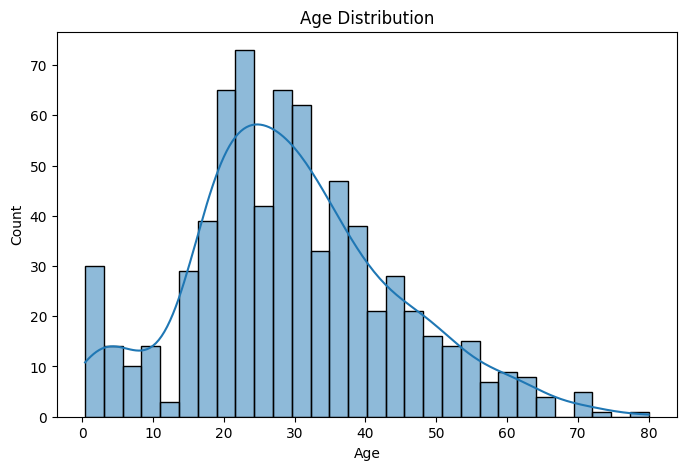

In [40]:
## Plot distribution of Age
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

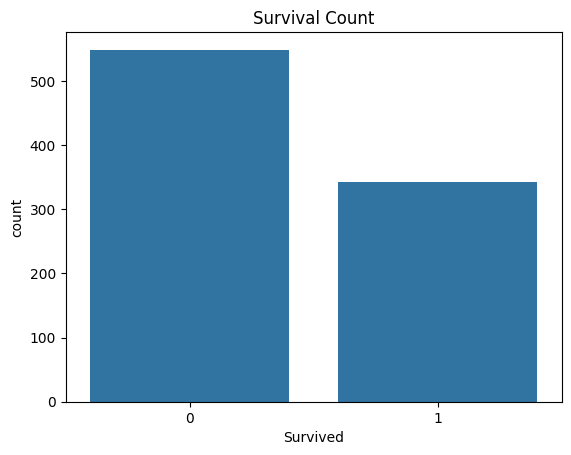

In [ ]:
# Count of Survived vs Not Survived
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

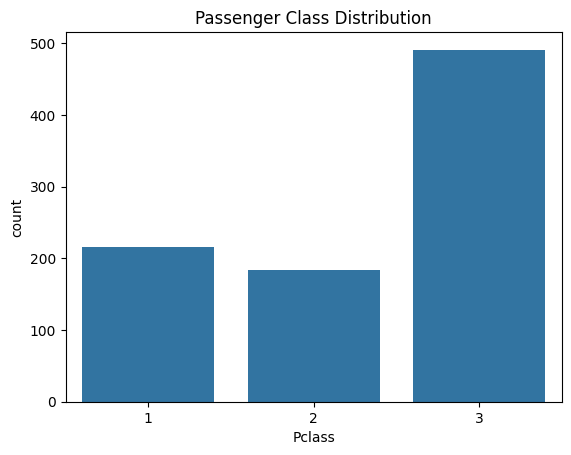

In [ ]:
# Count of Passengers by Class
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

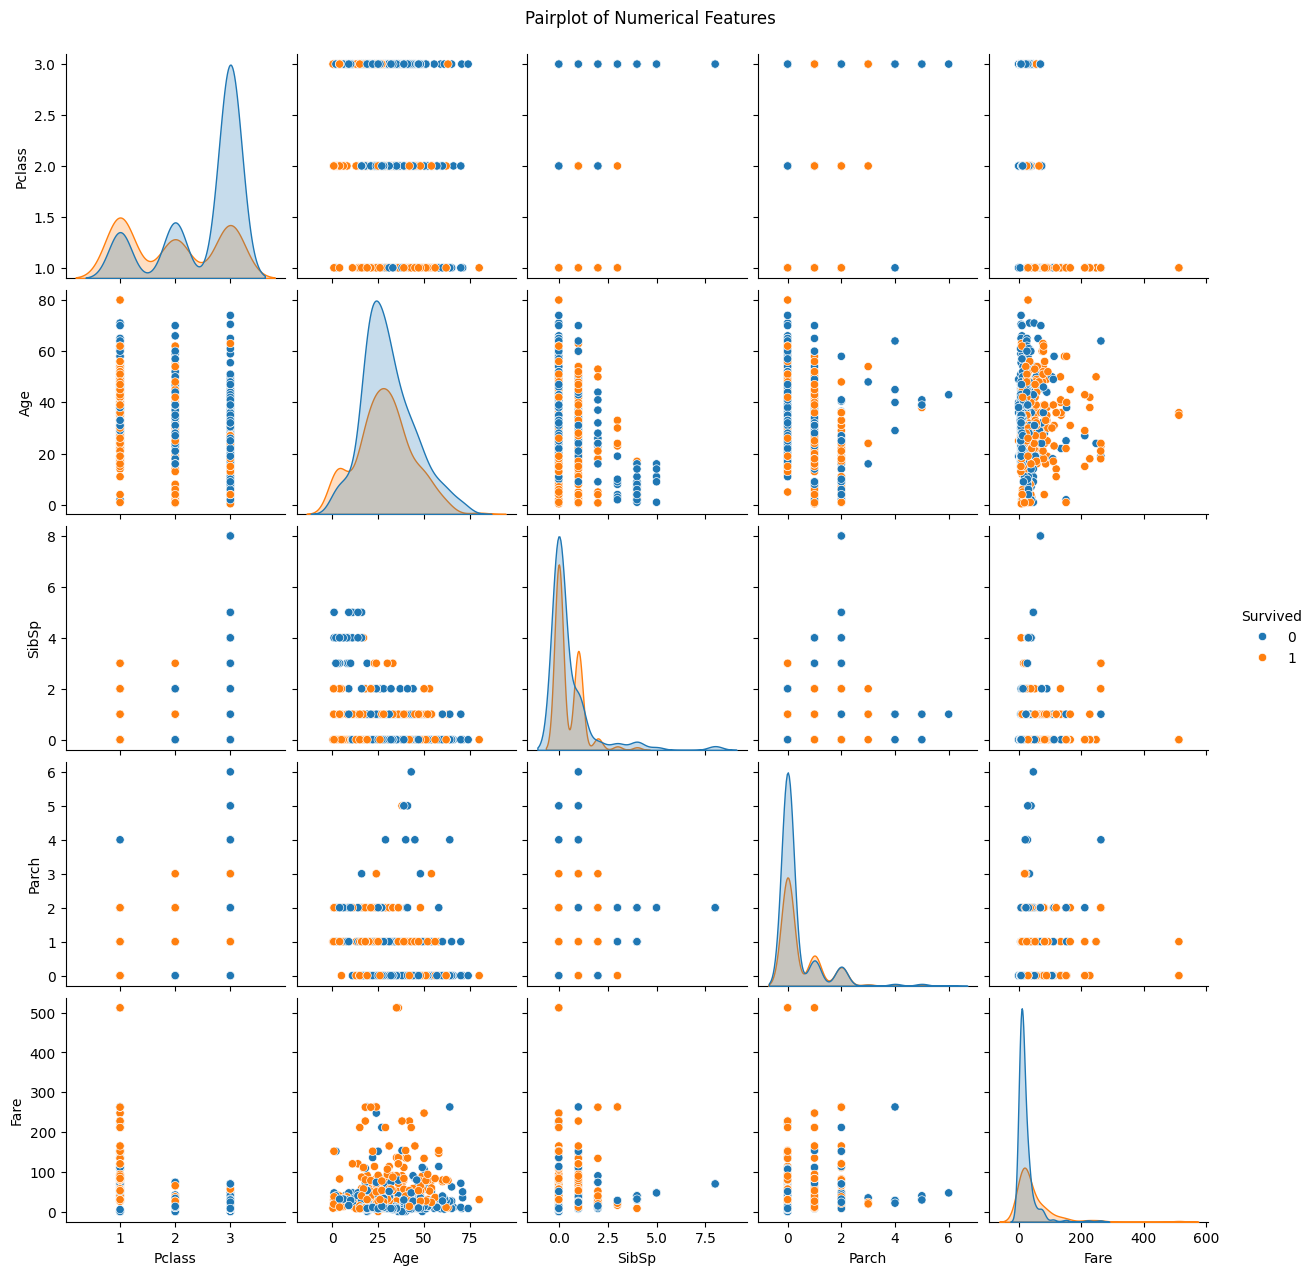

In [ ]:
# Pairplot of selected numerical features with hue as 'Survived'
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], hue='Survived')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

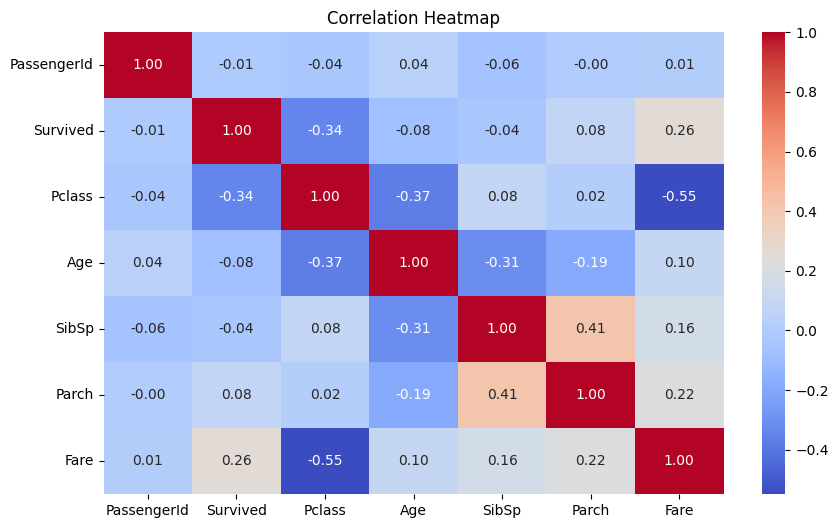

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

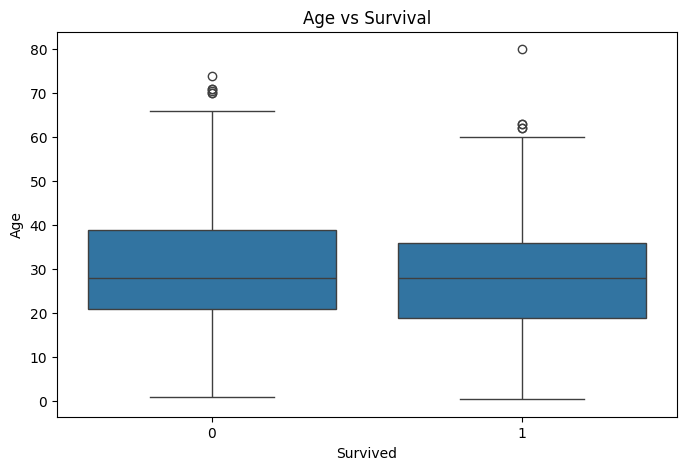

In [ ]:
# Boxplot of Age vs Survived
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()

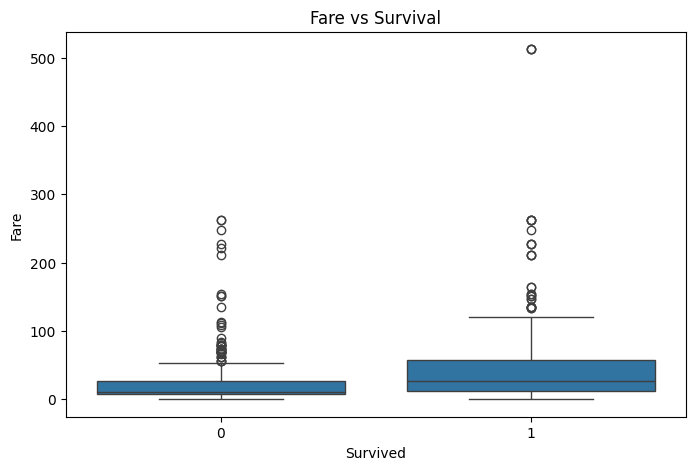

In [ ]:
# Boxplot of Fare vs Survived
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.show()

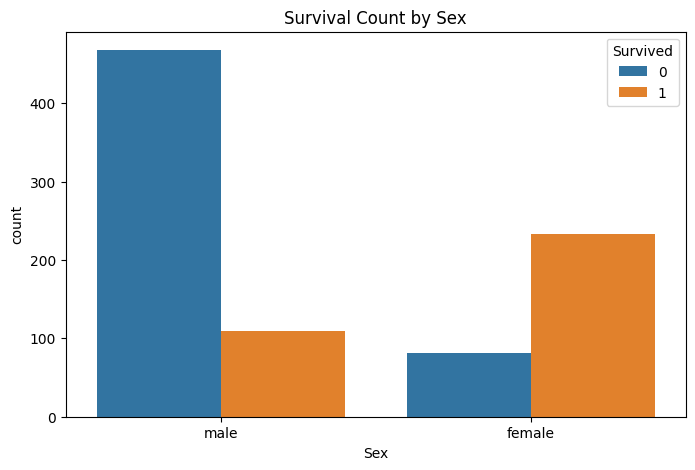

In [ ]:
# Countplot of Sex vs Survived
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')
plt.show()

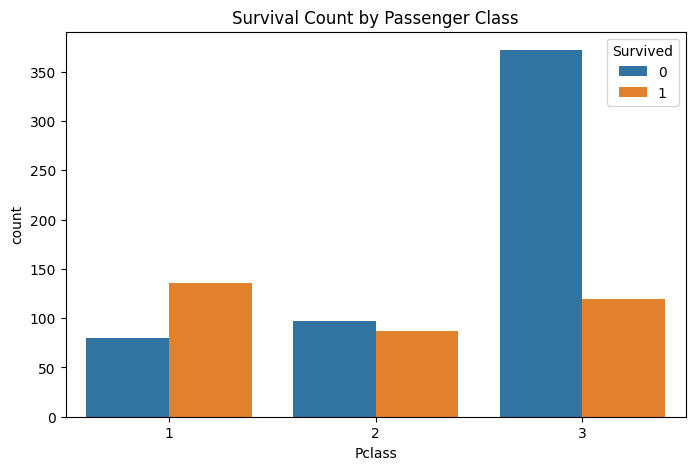

In [ ]:
# Countplot of Pclass vs Survived
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

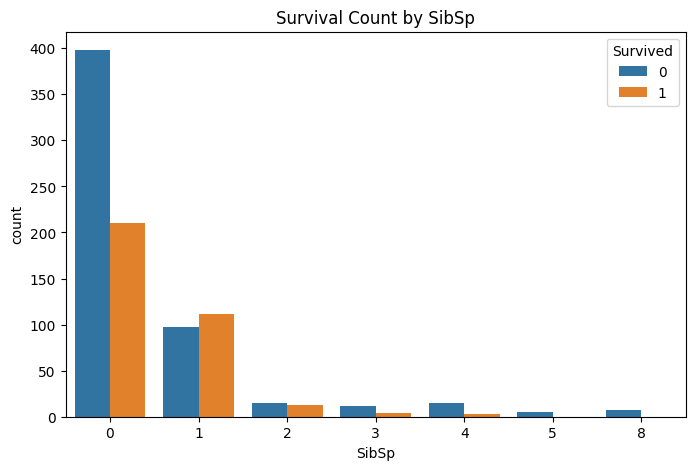

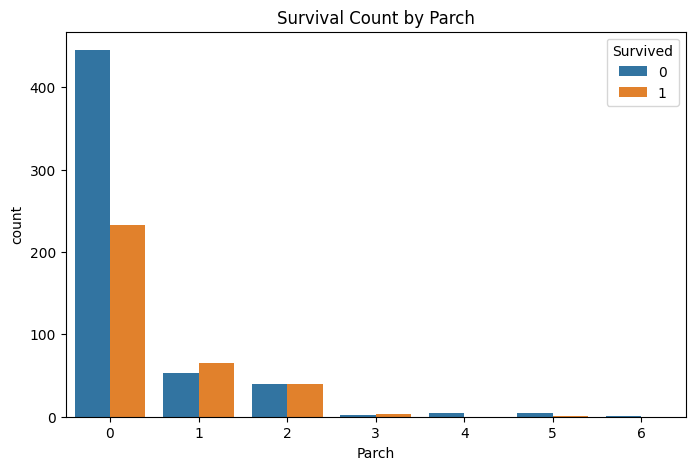

In [ ]:
# Survival based on number of siblings/spouses aboard
plt.figure(figsize=(8, 5))
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title('Survival Count by SibSp')
plt.show()

# Survival based on number of parents/children aboard
plt.figure(figsize=(8, 5))
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('Survival Count by Parch')
plt.show()


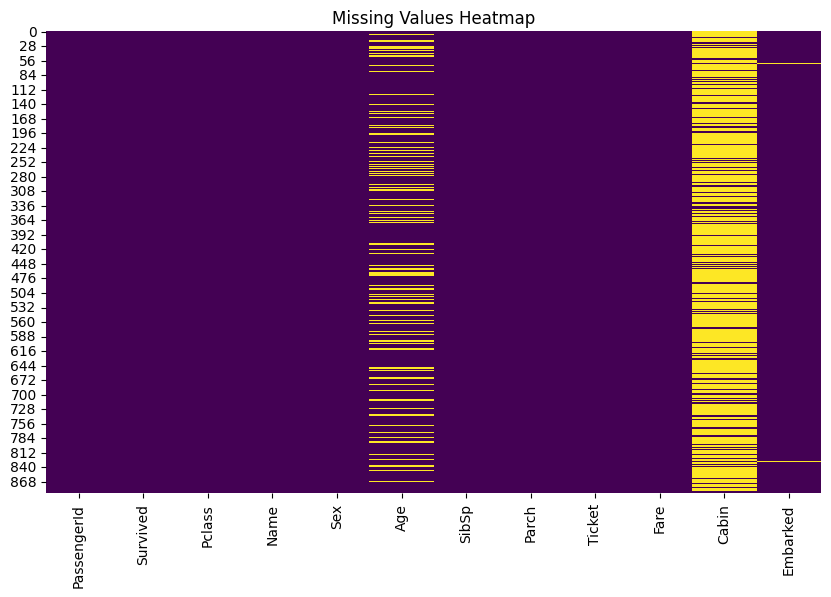

In [ ]:
# Handle Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

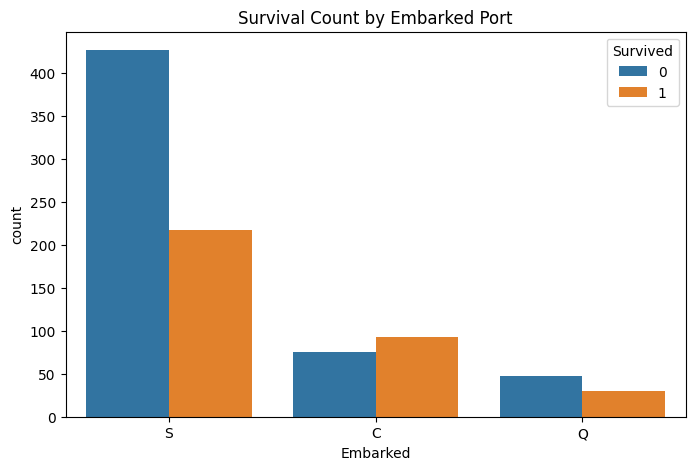

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
# Countplot Embarked vs Survival
plt.figure(figsize=(8,5))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarked Port')
plt.show()
df['Embarked'].value_counts()

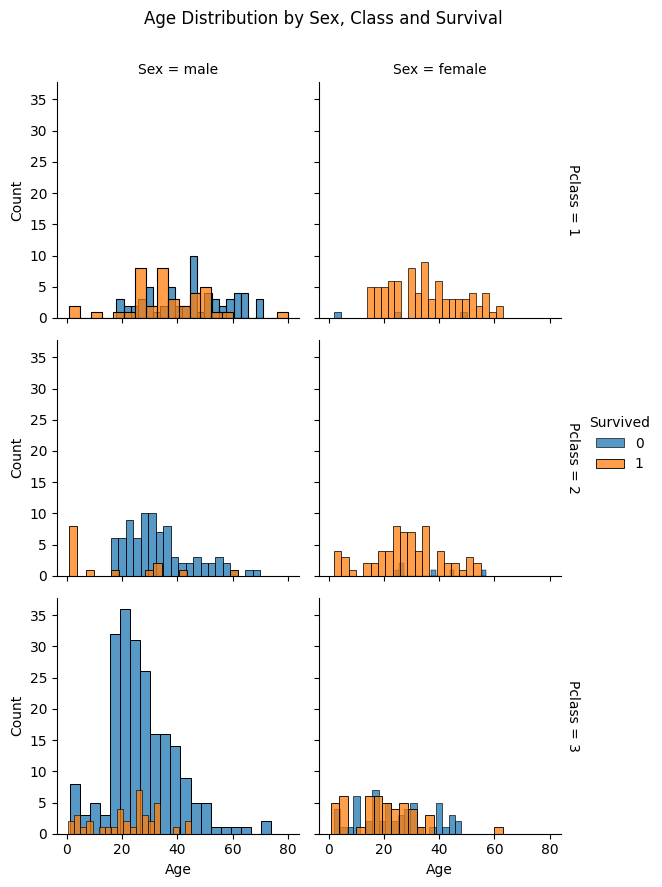

In [ ]:
# Multivariate Visualization
g = sns.FacetGrid(df, col='Sex', row='Pclass', hue='Survived', margin_titles=True)
g.map_dataframe(sns.histplot, x='Age', bins=20, kde=False)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age Distribution by Sex, Class and Survival')
plt.show()


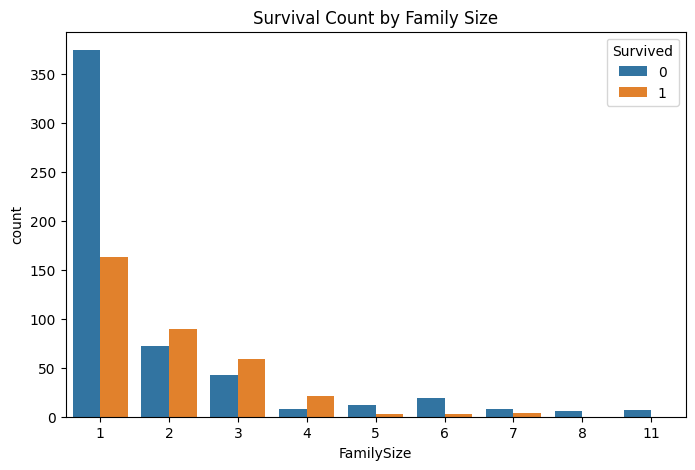

In [ ]:
# Feature Engineering Ideas
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

plt.figure(figsize=(8,5))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Survival Count by Family Size')
plt.show()

In [54]:
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

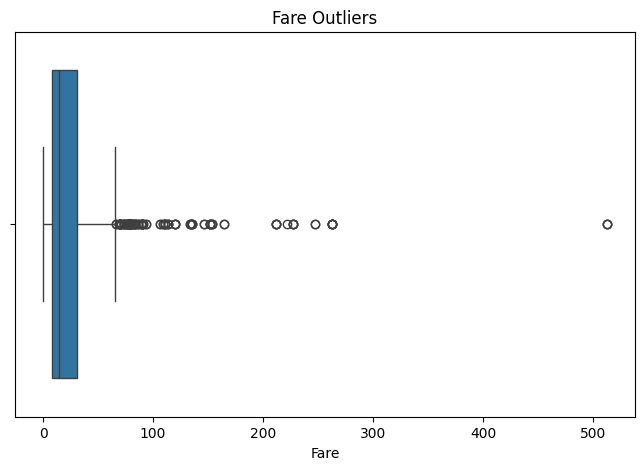

In [ ]:
# Outlier Detection
plt.figure(figsize=(8,5))
sns.boxplot(x='Fare', data=df)
plt.title('Fare Outliers')
plt.show()


In [ ]:
# Missing Data Table
missing_data = df.isnull().mean().sort_values(ascending=False) * 100
print(missing_data)

Cabin          77.104377
Embarked        0.224467
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
Sex             0.000000
Name            0.000000
Age             0.000000
SibSp           0.000000
Ticket          0.000000
Parch           0.000000
Fare            0.000000
FamilySize      0.000000
dtype: float64


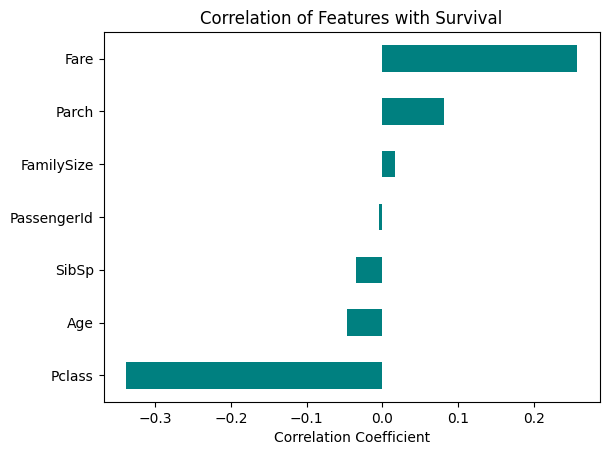

In [ ]:
# Correlation with Target
corr = df.corr(numeric_only=True)['Survived'].drop('Survived').sort_values()
corr.plot(kind='barh', color='teal')
plt.title('Correlation of Features with Survival')
plt.xlabel('Correlation Coefficient')
plt.show()

In [58]:
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv('gender_submission.csv')

In [59]:
test_df = pd.read_csv('test.csv')
test_df.info()
test_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Sample preparation
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']
X = X.fillna(X.mean())

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, predictions))


Validation Accuracy: 0.7318435754189944
